<a href="https://colab.research.google.com/github/sgwlee96/CNN/blob/main/CAPTCHA_Cracker_Exercise.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Thu Dec 23 05:09:17 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 495.44       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla K80           Off  | 00000000:00:04.0 Off |                    0 |
| N/A   40C    P8    29W / 149W |      0MiB / 11441MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Import Packages

In [3]:
import os
import cv2
from glob import glob
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Dataset

In [4]:
!wget https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
!unzip -q captcha_images_v2.zip

--2021-12-23 05:09:25--  https://github.com/AakashKumarNain/CaptchaCracker/raw/master/captcha_images_v2.zip
Resolving github.com (github.com)... 140.82.112.4
Connecting to github.com (github.com)|140.82.112.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip [following]
--2021-12-23 05:09:25--  https://raw.githubusercontent.com/AakashKumarNain/CaptchaCracker/master/captcha_images_v2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9075967 (8.7M) [application/zip]
Saving to: ‘captcha_images_v2.zip.1’

captcha_images_v2.z 100%[===================>]   8.66M  --.-KB/s    in 0.1s    

2021-12-23 05:09:25 (68.1 MB/s) - ‘captcha_images_v2.zi

# Dataset image preview

In [5]:
img_lst = glob('captcha_images_v2/*.png')
len(img_lst)

1040

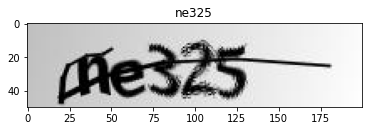

In [6]:
img = cv2.imread(img_lst[0])

label = os.path.splitext(os.path.basename(img_lst[0]))[0] # splitext => split file name and extection. ex) text.txt => ('text', 'txt')

plt.title(label)
plt.imshow(img)

# Preprocessing

In [7]:
imgs = []
labels = []
max_length = 0

for img_path in img_lst:
  imgs.append(img_path)

  label = os.path.splitext(os.path.basename(img_path))[0]
  labels.append(label)

  if len(label) > max_length:
    max_length = len(label)

print(len(imgs), len(labels), max_length)

1040 1040 5


In [8]:
# 라벨을 전부 공백없이 붙여줌

''.join(labels)

'ne32557gnx76y6ffy2nd33n73573d8fw3b2f5e5e57b27xp24p6g45w5bnd73bx86px8n87wnpmgn2d3ffpxfef4mn6fgdwfg8n46n6gg6n5fdwddcpm67b3bw5ymcc845b6f2pg3ex38d2ndx6b5mg7wxwbgem5gy8xb7xd5m2wc382cegf77387c753e8egggf85y385622dn2ymndg2b3ebpw4cfw8be3bp24pew3xng6pgg3nn373ndnmd8fwxdpe2d66fcmemxbem6fxpw35mfff36nx47pn5gd3c7ybefbdxemyg7yf62c482bmd3448db6725w53pp546gnbn45p3mme2mg2nfg237xcyd8n56mbny23myf82nwncng7gnfxxbm5pnmxfy5g87d236nng6yp7dxbdmmg38p2dw74c8n8gcx6fcffp4yeyn4mfc35pgmn2n5x2ngfxcc63pxecpe63cfp86nwfden5w5g68x48edwnydbfen76353yew6pmmc5nxwx7dndyfemxnw4xnfx5nwg2mmw5p2gnc3n33f7m24f6wc4bgd8gf7ng78gnn3ffncwmnyb84xc38n578nn733xcgg33p4ebgb4828x47c4bnyeng53bcwnn87nymf4wfnppwydeppg3mwxwpc2pg6wfy5mxxneyn4b4m43geygm7n85yxgpe6b7yd378n3mxdnd4n826ecbn3fbxdddcdd5nxnnnpxb7ymp7gwc2bd5np4menn7n6e6pnp8ngxpm363mggce5pm6b268g2d6fcncd6p4f858xmmy5n2w4y753mn83d7bdwm7467bb7bncw4g7bwm22nf264743pfpw765xwcgm23bpmddgbbny4wcdcb3b3xpnbw44wcm6yb6b46gypp8f22d5nf83pngxx2pp24gnfnbfw4n2yg5x7x5egxmp44xe83n3cf3p4nn8fexn5mnpdx458wyd38e62nb

In [9]:
characters = set(''.join(labels)) # Use set function to delete overlapping values
characters

{'2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 'b',
 'c',
 'd',
 'e',
 'f',
 'g',
 'm',
 'n',
 'p',
 'w',
 'x',
 'y'}

# Encoded Labels

In [10]:
char_to_num = layers.experimental.preprocessing.StringLookup(
    vocabulary=list(characters), num_oov_indices=0, mask_token=None 
)

num_to_char = layers.experimental.preprocessing.StringLookup(
    vocabulary=char_to_num.get_vocabulary(), num_oov_indices=0, mask_token=None, invert=True
)

print(labels[0])
encoded = char_to_num(tf.strings.unicode_split(labels[0], input_encoding='UTF-8')) # unicod_split 함수가 문자를 하나씩 split 해줌. ex)'x74b2' => x,7,4,b,2
print(encoded)

ne325
tf.Tensor([17 16  0  7  8], shape=(5,), dtype=int64)


* **keras**에서 제공하는 `StringLookup` 를 사용하면 unique 한 character들의 list를 `vocabulary`에 넣어주면 자동으로 각각의 문자열을 숫자로 매칭을 해줌. (문자와 숫자를 one-to-one으로 매칭)

* 반대로 Decoding 을 할때는 `invert=True`를 사용

In [11]:
# 다시 decode 하는 방법. 
# encoded된 값을 위에서 만든 num_to_char function에 넣고 numpy()를 사용해서 array로 바꾸고 decode()를 사용해서 byte로 돼 있는 array 값을 문자로 바꿈
tf.strings.reduce_join(num_to_char(encoded)).numpy().decode('utf-8')


'ne325'

# Split Dataset

In [12]:
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(imgs, labels, test_size=0.1, random_state=777)

print(len(x_train), len(y_train))
print(len(x_val), len(y_val))

936 936
104 104


# Create Data Generator

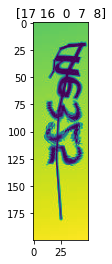

In [13]:
img_width = 200
img_height = 50

def encode_single_sample(img_path, label):
  # 1. Read Image
  img = tf.io.read_file(img_path)
  # 2. Decode and convert to grayscale
  img = tf.io.decode_png(img, channels=1)
  # 3. Convert to float32 in [0,1] range
  img = tf.image.convert_image_dtype(img, tf.float32)
  # 4. Resize to the desired size
  img = tf.image.resize(img, [img_height, img_width])
  # 5. Transpose the image
  # We want the time dimension to correspond to the width of the image. (Captcha 를 분석할때 위에서 부터 아래로 분석하게 만듦)
  img = tf.transpose(img, perm=[1, 0, 2])
  # 6. Map the characters in label to numbers
  label = char_to_num(tf.strings.unicode_split(label, input_encoding="UTF-8"))
  # 7. Return a dict as our model is expecting two inputs
  return {'image' : img, 'label' : label}

preview = encode_single_sample(imgs[0], labels[0])

plt.title(str(preview['label'].numpy()))
plt.imshow(preview['image'].numpy().squeeze())

In [14]:
batch_size = 32

train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = (
    train_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

validataion_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
validataion_dataset = (
    validataion_dataset.map(
        encode_single_sample, num_parallel_calls=tf.data.experimental.AUTOTUNE
    )
    .batch(batch_size)
    .prefetch(buffer_size=tf.data.experimental.AUTOTUNE)
)

print(train_dataset)
print(validataion_dataset)

<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>
<PrefetchDataset shapes: {image: (None, 200, 50, 1), label: (None, None)}, types: {image: tf.float32, label: tf.int64}>


* `tf.data.Dataset` 을 사용하면 빠르게 학습할 수 있는 장점이 있음. 
    - Reason? 
    - TensorFlow에서 `feed-dict`만을 사용해서 데이터를 처리하는 것은 느림. (batch 및 shuffle을 직접 구현해야함)
    - 모델에 데이터를 제대로 공급하려면 입력 파이프라인을 만들어서 GPU로 들어올 데이터를 멈춰있게 하지 않아야 한다. 
    - 그러므로 TensorFlow에서 제공하는 `Dataset` API를 사용해서 작업을 처리하는 것. 

* `from_tensor_slices` : `tf.data.Dataset`을 생성하는 함수로 입력된 tensor로부터 slices를 생성. 
    - ex) 학습데이터 (6000,28,28)이 입력되면, 6000개의 slices로 만들고 각각 slice를 28 x 28 의 이미지 크키로 resize함. 

# Model 

In [15]:
class CTCLayer(layers.Layer):
  def __init__(self, name=None):
    super().__init__(name=name)
    self.loss_fn = keras.backend.ctc_batch_cost

  def call(self, y_true, y_pred):
    # Compute the training-time loss value and add it
    # to the layer using 'self.add_loss()'.
    batch_len = tf.cast(tf.shape(y_true)[0], dtype='int64')
    input_length = tf.cast(tf.shape(y_pred)[1], dtype='int64')
    label_length = tf.cast(tf.shape(y_true)[1], dtype='int64')

    input_length = input_length * tf.ones(shape=(batch_len, 1), dtype='int64')
    label_length = label_length * tf.ones(shape=(batch_len, 1), dtype='int64')

    loss = self.loss_fn(y_true, y_pred, input_length, label_length)
    self.add_loss(loss) 

    return y_pred

* 여기서 사용할 **loss function** 은 **CTC Loss function**. 
   - CTC Loss?
   - Connectionist Temporal Classification
   - 원래는 음성 분석에서 많이 쓰이던 방식. 
   - Calculates a loss between a continuous(unsegmented) time series and a target sequence. 

In [16]:
from tensorflow.python.keras.backend import dropout
def build_model():
  # Inputs to the model
  input_img = layers.Input(
      shape=(img_width, img_height, 1), name='image', dtype='float32'
  )
  labels = layers.Input(name='label', shape=(None,), dtype='float32')

  # First convolution block
  x = layers.Conv2D(
      32, 
      (3, 3),
      activation='relu',
      kernel_initializer='he_normal',
      padding='same',
      name='Conv1',
  )(input_img)
  
  x = layers.MaxPooling2D((2, 2), name='pool1')(x)

  # Second convolution block
  x = layers.Conv2D(
      64,
      (3, 3), 
      activation='relu', 
      kernel_initializer='he_normal', 
      padding='same',
      name='Conv2',
  )(x)

  x = layers.MaxPooling2D((2, 2), name='pool2')(x)

  # We have used two max pool with pool size and strides of 2. 
  # Hence, downsampled feature maps are 4x smaller. 
  # The number of filters in the last layer is 64. 
  # Reshape accordingly before passing the output ot the RNN part of the model. 
  new_shape = ((img_width // 4), (img_height //  4) * 64)
  x = layers.Reshape(target_shape=new_shape, name='reshape')(x)
  x = layers.Dense(64, activation='relu', name='dense1')(x)
  x = layers.Dropout(0.2)(x)

  # RNNs
  x = layers.Bidirectional(layers.LSTM(128, return_sequences=True, dropout=0.25))(x)
  x = layers.Bidirectional(layers.LSTM(64, return_sequences=True, dropout= 0.25))(x)

  # Output Layer
  # len(get_vocabulary()) + 1 을 하는 이유 : 모델이 읽어내지 못한 unknown
  # 값이 나올 경우를 대비. 
  x = layers.Dense(
      len(char_to_num.get_vocabulary()) + 1, activation='softmax', name='dense2'
  )(x)

  # Add CTC layer for calculationg CTC loss a each step
  output = CTCLayer(name='ctc_loss')(labels, x)

  # Define the model
  model = keras.models.Model(
      inputs=[input_img, labels], outputs=output, name='ocr_model_v1'
  )

  # Optimizer
  opt = keras.optimizers.Adam()
  # Compile the model and return
  model.compile(optimizer=opt)
  return model 


# Get the model 
model = build_model()
model.summary()

Model: "ocr_model_v1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 image (InputLayer)             [(None, 200, 50, 1)  0           []                               
                                ]                                                                 
                                                                                                  
 Conv1 (Conv2D)                 (None, 200, 50, 32)  320         ['image[0][0]']                  
                                                                                                  
 pool1 (MaxPooling2D)           (None, 100, 25, 32)  0           ['Conv1[0][0]']                  
                                                                                                  
 Conv2 (Conv2D)                 (None, 100, 25, 64)  18496       ['pool1[0][0]']       

# Train

In [17]:
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss', patience=10, restore_best_weights=True
)

history = model.fit(
    train_dataset,
    validation_data=validataion_dataset,
    epochs=100,
    callbacks=[early_stopping],
)

Epoch 1/100
30/30 [==============================] - 26s 359ms/step - loss: 23.9354 - val_loss: 16.4499
Epoch 2/100
30/30 [==============================] - 5s 166ms/step - loss: 16.3609 - val_loss: 16.3569
Epoch 3/100
30/30 [==============================] - 5s 158ms/step - loss: 16.3184 - val_loss: 16.3248
Epoch 4/100
30/30 [==============================] - 4s 120ms/step - loss: 16.3192 - val_loss: 16.3291
Epoch 5/100
30/30 [==============================] - 4s 123ms/step - loss: 16.3198 - val_loss: 16.3265
Epoch 6/100
30/30 [==============================] - 4s 122ms/step - loss: 16.3154 - val_loss: 16.3205
Epoch 7/100
30/30 [==============================] - 4s 121ms/step - loss: 16.3180 - val_loss: 16.3244
Epoch 8/100
30/30 [==============================] - 4s 123ms/step - loss: 16.3110 - val_loss: 16.3170
Epoch 9/100
30/30 [==============================] - 4s 122ms/step - loss: 16.3064 - val_loss: 16.2935
Epoch 10/100
30/30 [==============================] - 4s 125ms/step - lo

# Test Inference

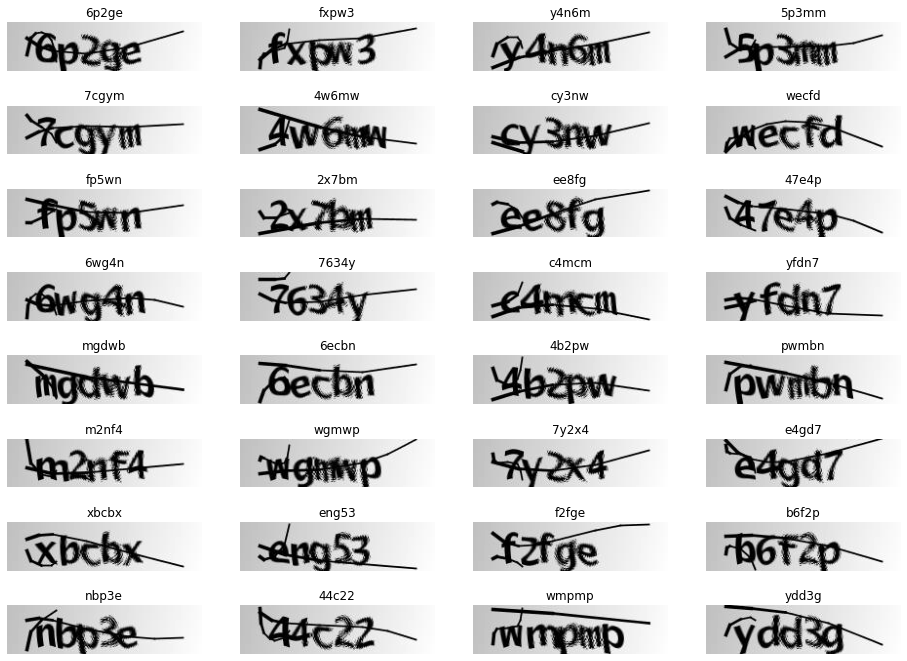

In [23]:
prediction_model = keras.models.Model(
    model.get_layer(name='image').input, model.get_layer(name='dense2').output
)

def decode_batch_predictions(pred):
  input_len = np.ones(pred.shape[0]) * pred.shape[1]
  # Use greedy search.
  # For complex tasks, we can use beam search
  results = keras.backend.ctc_decode(pred, input_length=input_len, greedy=True)[0][0][
    :, :max_length
  ]
  # Iterate over the results and get back the next
  output_text = []
  for res in results:
    res = tf.strings.reduce_join(num_to_char(res)).numpy().decode('utf-8')
    output_text.append(res)
  return output_text

for batch in validataion_dataset.take(1):
  batch_images = batch['image']

  preds = prediction_model.predict(batch_images)
  pred_texts = decode_batch_predictions(preds)

  _, axes = plt.subplots(8, 4, figsize=(16,12))

  for img, text, ax in zip(batch_images, pred_texts, axes.flatten()):
    img = img.numpy().squeeze()
    img = img.T # Transpose

    ax.imshow(img, cmap='gray')
    ax.set_title(text)
    ax.set_axis_off()

# Save Model

In [24]:
from keras.models import load_model

model.save('OCR_captcha.h5')